# Exploratory Data Analysis - Business Case

#### Utils

Sobre os dados coletados:

Para fornecer a energia a corrente elétrica (principal e atrasada) flui pelo circuito elétrico. A corrente principal é a corrente que é usada para alimentar os equipamentos elétricos e realizar trabalho útil, enquanto a corrente atrasada é a corrente que flui em resposta aos elementos capacitivos e indutivos presentes no circuito elétrico.

O fator de potência é uma medida da eficiência com que a energia elétrica é utilizada na fábrica. Um fator de potência baixo indica que há uma grande componente de corrente atrasada no circuito elétrico, o que leva a um desperdício de energia elétrica e pode aumentar os custos da conta de energia elétrica. Um fator de potência alto indica que a energia elétrica está sendo utilizada de forma mais eficiente e que há menos desperdício de energia elétrica.

Quando o fator de potência é baixo, significa que uma grande quantidade de energia está sendo armazenada e devolvida ao circuito elétrico, o que aumenta a corrente total no circuito. Isso ocorre porque a corrente reativa, que é necessária para armazenar e devolver energia ao circuito, não realiza trabalho útil e não contribui para a potência real consumida pela carga. Assim, quanto maior a componente de corrente reativa no circuito elétrico, maior será a corrente total que deve ser fornecida pela fonte de energia elétrica. Isso leva a um desperdício de energia elétrica e pode aumentar os custos operacionais. Um fator de potência alto indica que a energia elétrica está sendo utilizada de forma mais eficiente e com menor componente de corrente reativa, o que resulta em menor corrente total no circuito. Isso pode reduzir o desperdício de energia elétrica e melhorar a eficiência do sistema elétrico.

A carga elétrica é a quantidade de energia elétrica consumida por um dispositivo ou circuito elétrico.Para uma determinada tensão, a corrente elétrica aumenta à medida que a resistência diminui, mas para uma determinada resistência, a corrente elétrica diminui à medida que a tensão diminui. Assim, quanto maior a carga elétrica em um circuito, maior a corrente elétrica necessária para fornecer a energia elétrica para a carga.

A carga elétrica pode ser resistiva, capacitiva ou indutiva. Tratando da fábrica da Gerdau, a carga elétrica é capacitiva e indutiva (motores e transformadores) e consomem energia tanto na forma de potência ativa quanto na forma de potência reativa, com isso o fator de potência é menor que 1. 

E no circuito elétrico com cargas capacitivas ou indutivas, a corrente atrasada é uma componente significativa da corrente total, o que leva a um baixo fator de potência. Isso resulta em desperdício de energia elétrica e pode aumentar os custos da conta de energia elétrica. Com isso é necessário uma análise em relação aos fatores de potência a fim de melhora-lo, seja com a instalação de capacitores, resistores ou indutores para reduzir a corrente atrasada e aumentar a potência ativa consumida pela carga.

Para melhorar o fator de potência em um circuito elétrico, pode ser necessário adicionar capacitores em paralelo para reduzir a corrente atrasada e aumentar a potência ativa consumida pela carga. Isso reduz a corrente total no circuito e aumenta a eficiência do sistema elétrico.


            
   | Nome inicial  | Mudança Feature    | Description.                                         | Tipo Variável | 
   |---------------|--------------------|------------------------------------------------------|---------------|
   | Data          |  data              | Data de registro do consumo                          | Continua      |
   | Energia_usada |  energia           | Consumo de energia da empresa [kWh]                  | Continua      |
   | V1            |  cor_atrasada      | Corrente atrasada [kVarh]                            | Continua      |
   | V2            |  cor_principal     | Corrente principal [kVarh]                           | Continua      |
   | V3            |  med_CO2           | Medições de C02 [ppm]                                | Continua      |
   | V4            |  fat_pot_atrasado  | Fator de potência atual atrasado                     | Continua      |
   | V5            |  fat_pot_principal | Fator de potência atual principal                    | Continua      |
   | V6            |  seg_no_dia        | Número de segundos a partir da meia-noite [S]        | Continua      |
   | V7            |  est_semanal       | Estado da semana (Final de semana ou dia da semana)  | Categorica    |
   | V8            |  dia_semana        | Dia da semana (Terça-feira, Sábado, etc)             | Categorica    |
   | V9            |  carga             | Tipo de carga (Carga leve, Carga média, Carga máxima)| Categorica    | 

## Importações

In [230]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [231]:
# Importando dados
df_energy = pd.read_csv('../data/dataset.csv')

## Visualização dos dados

In [232]:
# Visualizando as cinco primeiras linhas
df_energy.head()

Data  Energia_usada    V1   V2   V3     V4     V5    V6  \
0  01/01/2018 00:15           3.17  2.95  0.0  0.0  73.21  100.0   900   
1  01/01/2018 00:30           4.00  4.46  0.0  0.0  66.77  100.0  1800   
2  01/01/2018 00:45           3.24  3.28  0.0  0.0  70.28  100.0  2700   
3  01/01/2018 01:00           3.31  3.56  0.0  0.0  68.09  100.0  3600   
4  01/01/2018 01:15           3.82  4.50  0.0  0.0  64.72  100.0  4500   

              V7             V8          V9  
0  Dia da Semana  Segunda-feira  Carga leve  
1  Dia da Semana  Segunda-feira  Carga leve  
2  Dia da Semana  Segunda-feira  Carga leve  
3  Dia da Semana  Segunda-feira  Carga leve  
4  Dia da Semana  Segunda-feira  Carga leve

In [233]:
#Visualizando as medidas descritivas do dataframe
df_energy.describe()

Energia_usada            V1            V2            V3            V4  \
count   35040.000000  35040.000000  35040.000000  35040.000000  35040.000000   
mean       27.386892     13.035384      3.870949      0.011524     80.578056   
std        33.444380     16.306000      7.424463      0.016151     18.921322   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         3.200000      2.300000      0.000000      0.000000     63.320000   
50%         4.570000      5.000000      0.000000      0.000000     87.960000   
75%        51.237500     22.640000      2.090000      0.020000     99.022500   
max       157.180000     96.910000     27.760000      0.070000    100.000000   

                 V5            V6  
count  35040.000000  35040.000000  
mean      84.367870  42750.000000  
std       30.456535  24940.534317  
min        0.000000      0.000000  
25%       99.700000  21375.000000  
50%      100.000000  42750.000000  
75%      100.000000  64125.000000  
max      100.000000  85500.000000

In [234]:
# Verificando o tamanho do dataframe
df_energy.shape

(35040, 11)

In [235]:
# Verificando os tipos de dados
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           35040 non-null  object 
 1   Energia_usada  35040 non-null  float64
 2   V1             35040 non-null  float64
 3   V2             35040 non-null  float64
 4   V3             35040 non-null  float64
 5   V4             35040 non-null  float64
 6   V5             35040 non-null  float64
 7   V6             35040 non-null  int64  
 8   V7             35040 non-null  object 
 9   V8             35040 non-null  object 
 10  V9             35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [236]:
# Verificando dados duplicados
df_energy.duplicated().sum()

0

In [237]:
# Verificando valores nulos
df_energy.isnull().sum()

Data             0
Energia_usada    0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
dtype: int64

In [238]:
# Alterando os nomes das colunas para facilitar o entendimento das informações
columns = ['data', 'energia', 'cor_atrasada', 'cor_principal', 'med_CO2', 'fat_pot_atrasado',
            'fat_pot_principal', 'seg_no_dia', 'est_semanal', 'dia_semana', 'carga']
df_energy.columns = columns
df_energy.head()

data  energia  cor_atrasada  cor_principal  med_CO2  \
0  01/01/2018 00:15     3.17          2.95            0.0      0.0   
1  01/01/2018 00:30     4.00          4.46            0.0      0.0   
2  01/01/2018 00:45     3.24          3.28            0.0      0.0   
3  01/01/2018 01:00     3.31          3.56            0.0      0.0   
4  01/01/2018 01:15     3.82          4.50            0.0      0.0   

   fat_pot_atrasado  fat_pot_principal  seg_no_dia    est_semanal  \
0             73.21              100.0         900  Dia da Semana   
1             66.77              100.0        1800  Dia da Semana   
2             70.28              100.0        2700  Dia da Semana   
3             68.09              100.0        3600  Dia da Semana   
4             64.72              100.0        4500  Dia da Semana   

      dia_semana       carga  
0  Segunda-feira  Carga leve  
1  Segunda-feira  Carga leve  
2  Segunda-feira  Carga leve  
3  Segunda-feira  Carga leve  
4  Segunda-feira  Carga leve

In [239]:
# Verificando a correlação dos dados
df_energy.corr()

C:\Users\amand\AppData\Local\Temp\ipykernel_6728\3832004974.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



energia  cor_atrasada  cor_principal   med_CO2  \
energia            1.000000      0.896150      -0.324922  0.988180   
cor_atrasada       0.896150      1.000000      -0.405142  0.886948   
cor_principal     -0.324922     -0.405142       1.000000 -0.332777   
med_CO2            0.988180      0.886948      -0.332777  1.000000   
fat_pot_atrasado   0.385960      0.144534       0.526770  0.379605   
fat_pot_principal  0.353566      0.407716      -0.944039  0.360019   
seg_no_dia         0.234610      0.082662       0.371605  0.231726   

                   fat_pot_atrasado  fat_pot_principal  seg_no_dia  
energia                    0.385960           0.353566    0.234610  
cor_atrasada               0.144534           0.407716    0.082662  
cor_principal              0.526770          -0.944039    0.371605  
med_CO2                    0.379605           0.360019    0.231726  
fat_pot_atrasado           1.000000          -0.519967    0.565270  
fat_pot_principal         -0.519967           1.000000   -0.360563  
seg_no_dia                 0.565270          -0.360563    1.000000

C:\Users\amand\AppData\Local\Temp\ipykernel_6728\3612808493.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



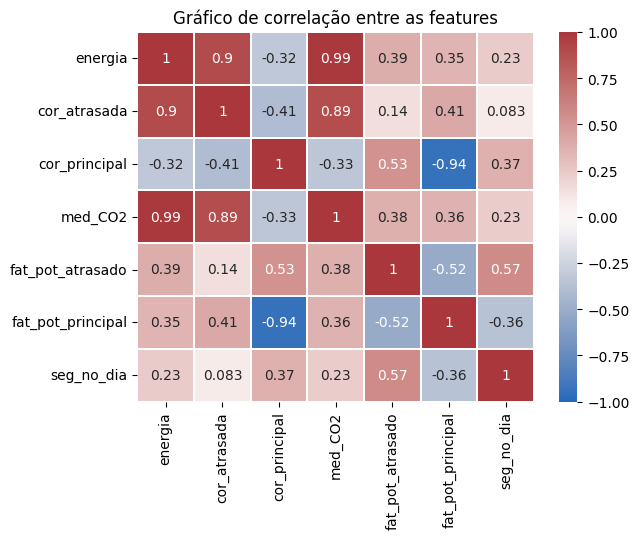

In [240]:
# Criando gráfico de correlação
plt.title('Gráfico de correlação entre as features')
sns.heatmap(df_energy.corr('pearson'), vmin = -1, cmap = sns.color_palette("vlag", as_cmap=True), linewidths= 0.1, linecolor='white', annot= True)
plt.show()

## Tratamento

In [241]:
# Criando uma cópia da coluna Data do dataframe para manipulação
df = df_energy[['data']].copy()

# Fazendo split na data, separando por dia, mes e horario do registro
df['horario'] = pd.DatetimeIndex(df.data).time
df['dia'] = pd.DatetimeIndex(df.data).day
df['mes'] = pd.DatetimeIndex(df.data).month
df.drop(columns = ['data'], inplace = True)

# Visualização das novas datas
df.head()

horario  dia  mes
0  00:15:00    1    1
1  00:30:00    1    1
2  00:45:00    1    1
3  01:00:00    1    1
4  01:15:00    1    1

In [242]:
# Removendo a coluna Data do dataframe principal
df_energy.drop(columns = ['data'], inplace = True)

In [243]:
# Concatenando os dataframes
df_energy = pd.concat([df, df_energy], axis = 1)
df_energy.head()

horario  dia  mes  energia  cor_atrasada  cor_principal  med_CO2  \
0  00:15:00    1    1     3.17          2.95            0.0      0.0   
1  00:30:00    1    1     4.00          4.46            0.0      0.0   
2  00:45:00    1    1     3.24          3.28            0.0      0.0   
3  01:00:00    1    1     3.31          3.56            0.0      0.0   
4  01:15:00    1    1     3.82          4.50            0.0      0.0   

   fat_pot_atrasado  fat_pot_principal  seg_no_dia    est_semanal  \
0             73.21              100.0         900  Dia da Semana   
1             66.77              100.0        1800  Dia da Semana   
2             70.28              100.0        2700  Dia da Semana   
3             68.09              100.0        3600  Dia da Semana   
4             64.72              100.0        4500  Dia da Semana   

      dia_semana       carga  
0  Segunda-feira  Carga leve  
1  Segunda-feira  Carga leve  
2  Segunda-feira  Carga leve  
3  Segunda-feira  Carga leve  
4  Segunda-feira  Carga leve

## Análise dos dados

Com as informações contidas no inicio deste notebook, é possível entender melhor como a teoria se aplica a todas as features em relação ao consumo energético da empresa. Mas tratando dos dados obtidos. Mas ainda sim, é necessário uma análise dos dados obtidos e verificar como é o comportamento dos dados.

Nesta análise de dados pretende-se responder as seguintes perguntas:
- Os dados estão bem distribuidos, ou existem muitas outliers no consumo?
- Como cada uma das features tem influência na feature de consumo de energia?
- Quais variáveis se relacionam? E de que forma? Tem causalidade? Qual é a causa?
- Tratando-se de consumo energético, qual a influencia da quantidade de CO2?
- Quais são as principais features para o modelo?

In [244]:
# Verificando as estatísticas dos dados com o dataframe atualizado
df_energy.describe()

dia           mes       energia  cor_atrasada  cor_principal  \
count  35040.000000  35040.000000  35040.000000  35040.000000   35040.000000   
mean      15.720548      6.526027     27.386892     13.035384       3.870949   
std        8.796373      3.447901     33.444380     16.306000       7.424463   
min        1.000000      1.000000      0.000000      0.000000       0.000000   
25%        8.000000      4.000000      3.200000      2.300000       0.000000   
50%       16.000000      7.000000      4.570000      5.000000       0.000000   
75%       23.000000     10.000000     51.237500     22.640000       2.090000   
max       31.000000     12.000000    157.180000     96.910000      27.760000   

            med_CO2  fat_pot_atrasado  fat_pot_principal    seg_no_dia  
count  35040.000000      35040.000000       35040.000000  35040.000000  
mean       0.011524         80.578056          84.367870  42750.000000  
std        0.016151         18.921322          30.456535  24940.534317  
min        0.000000          0.000000           0.000000      0.000000  
25%        0.000000         63.320000          99.700000  21375.000000  
50%        0.000000         87.960000         100.000000  42750.000000  
75%        0.020000         99.022500         100.000000  64125.000000  
max        0.070000        100.000000         100.000000  85500.000000

Analisando o describe, nota-se que até no terceiro quartil possui valores muito acima da média, tanto na 'energia', quanto na 'cor_atrasada', o que deve ser entendido.


Tratando-se de energia, um dos parâmetros principais para verificar a eficiencia energética é o fator de potência. Este em uma fabrica varia até o valor 1 e quanto menor, pior a eficiencia da energia. Assim, é estipulado um valor mínimo de 0,92 considerado "fator de potência aceitável", inferior a este valor é necessário rever a estrutura elétrica e verificar se há a necessidade de resistores ou capacitores. 

In [245]:
# Verificando quantidade de fatores de potencia com valor 0, para não obter estatística dos dados com valores nulos
df_energy.loc[(df_energy.fat_pot_principal == 0) | (df_energy.fat_pot_atrasado == 0)]

horario  dia  mes  energia  cor_atrasada  cor_principal  med_CO2  \
29855  00:00:00   11    7      0.0           0.0            0.0      0.0   

       fat_pot_atrasado  fat_pot_principal  seg_no_dia    est_semanal  \
29855               0.0                0.0           0  Dia da Semana   

         dia_semana       carga  
29855  Quarta-feira  Carga leve

In [246]:
# Verificando as medidas descritivas dos fatores de potencia
df_energy[['fat_pot_principal', 'fat_pot_atrasado']].loc[(df_energy.fat_pot_principal != 0) | (df_energy.fat_pot_atrasado != 0)].describe()

fat_pot_principal  fat_pot_atrasado
count       35039.000000      35039.000000
mean           84.370278         80.580356
std            30.453634         18.916695
min            12.500000         36.940000
25%            99.700000         63.320000
50%           100.000000         87.960000
75%           100.000000         99.025000
max           100.000000        100.000000

É importante verificar que em fábricas a corrente mais usada é a corrente atrasada devido a carga eletrica ser capacitiva ou indutiva (transformadores, motores e enfim). E neste caso a média do fator de potência indica que deve-se realizar uma verificação na parte elétrica da fábrica.

In [247]:
df_energy.groupby(['est_semanal', 'carga']).mean()

C:\Users\amand\AppData\Local\Temp\ipykernel_6728\3809546497.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



dia       mes    energia  cor_atrasada  \
est_semanal     carga                                                        
Dia da Semana   Carga leve    15.732092  6.446991  10.636348      8.918515   
                Carga maxima  15.717742  6.629032  64.044108     29.657265   
                Carga media   15.717742  6.629032  43.160774     16.757384   
Final de Semana Carga leve    15.501738  6.632677   5.374577      3.907753   
                Carga maxima  16.181818  6.109091  37.717295     10.557485   
                Carga media   16.181818  6.109091  17.183318      3.827398   

                              cor_principal   med_CO2  fat_pot_atrasado  \
est_semanal     carga                                                     
Dia da Semana   Carga leve         1.027208  0.003515         65.670337   
                Carga maxima       0.871897  0.029123         90.008953   
                Carga media        6.268596  0.018947         92.444478   
Final de Semana Carga leve         6.045485  0.000999         76.164893   
                Carga maxima       4.985136  0.016871         95.542636   
                Carga media       11.881057  0.006642         95.862159   

                              fat_pot_principal    seg_no_dia  
est_semanal     carga                                          
Dia da Semana   Carga leve            94.654215  23723.638968  
                Carga maxima          97.901310  53133.870968  
                Carga media           78.842664  61737.096774  
Final de Semana Carga leve            70.454224  35924.391657  
                Carga maxima          85.915553  52595.454545  
                Carga media           51.661034  62140.909091

Nota-se que o fator de potência atrasado deve ser verificado principalmente quando a carga é leve. Possivelmente deve-se haver muitas outliers em relação a energia gasta nas cargas leves - casos em que o fator de potencia atrasado está baixo - pois significa que a eficiencia energética está ruim, assim, mesmo que a carga de energia seja baixa, o custo fica mais alto do que o normal.
E quanto ao fator de potencia principal, por mais que este em carga média também esteja com parâmetros ruins, não interfere significativamente no custo operacional, já que em uma fábrica em grande parte utiliza-se mais a corrente atrasada. Mesmo assim, deve ser vistoriado.

Text(0, 0.5, 'Energia consumida KW/h')

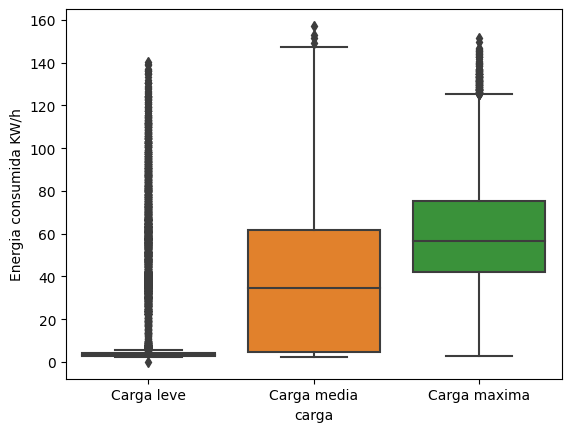

In [248]:
# Plotando os gráficos para verificar a existência de outliers de acordo com as cargas
sns.boxplot(data=df_energy, x='carga', y='energia');
plt.ylabel('Energia consumida KW/h')

É nítido que há inconsistencias quando a carga é leve. Os quartis ficam na casa dos 10kWh, mas alguns dados possuem consumo de energia até 140kWh na carga leve, o que é incomum até mesmo na carga máxima. Em relação a carga, ela é relativa a quantidade de energia elétrica consumida pelo circuito, assim quanto menor a carga elétrica em um circuito, menor a corrente elétrica necessária para fornecer a energia para a carga, dessa forma o consumo de energia é baixo. Então, por quais motivos com a carga leve, há um consumo alto de energia?

Entendendo melhor sobre a carga leve:

Primeiramente descobrindo as outliers

In [249]:
# Verificando os valores interquartis para descobrir qual o valor para considerar outlier dentro da carga leve
df_energy.loc[df_energy.carga == 'Carga leve'].describe()

dia           mes       energia  cor_atrasada  cor_principal  \
count  18072.000000  18072.000000  18072.000000  18072.000000   18072.000000   
mean      15.644090      6.517928      8.626207      7.004266       2.944328   
std        8.875802      3.520230     17.906245     11.683405       6.402794   
min        1.000000      1.000000      0.000000      0.000000       0.000000   
25%        8.000000      3.000000      2.950000      3.020000       0.000000   
50%       16.000000      7.000000      3.310000      4.460000       0.000000   
75%       23.000000     10.000000      4.030000      5.440000       0.000000   
max       31.000000     12.000000    140.290000     96.910000      27.760000   

            med_CO2  fat_pot_atrasado  fat_pot_principal    seg_no_dia  
count  18072.000000      18072.000000       18072.000000  18072.000000  
mean       0.002554         69.679545          85.409154  28384.661355  
std        0.008726         18.951731          30.070037  24108.527732  
min        0.000000          0.000000           0.000000      0.000000  
25%        0.000000         52.700000         100.000000  10800.000000  
50%        0.000000         66.270000         100.000000  21600.000000  
75%        0.000000         82.922500         100.000000  33300.000000  
max        0.060000        100.000000         100.000000  85500.000000

In [250]:
# Criando váriavel outlier - energia
outlier = (4.03) + (1.5 * (4.03 - 2.95))
outlier

5.65

Criando dois dataframes com carga = Carga leve, separando um com as outliers e outro sem para estudar o comportamento de ambas

In [251]:
# Separação das outliers e não outliers na carga leve, para verificar como os dados se comportam
otl_car_leve = df_energy[df_energy.columns[3:14]].loc[(df_energy.carga == 'Carga leve') & (df_energy.energia >= outlier)]
notl_car_leve = df_energy[df_energy.columns[3:14]].loc[(df_energy.carga == 'Carga leve') & (df_energy.energia <= outlier)]

In [252]:
# Medidas descritivas dos dados com outliers - carga leve
display(otl_car_leve.describe())

energia  cor_atrasada  cor_principal     med_CO2  fat_pot_atrasado  \
count  2279.000000   2279.000000    2279.000000  2279.00000       2279.000000   
mean     45.154085     30.676911       0.276380     0.02025         80.428868   
std      31.835105     20.243288       2.196181     0.01567          7.706212   
min       5.650000      0.000000       0.000000     0.00000         49.100000   
25%      16.775000      9.650000       0.000000     0.01000         74.925000   
50%      40.320000     29.770000       0.000000     0.02000         80.240000   
75%      64.675000     44.335000       0.000000     0.03000         85.315000   
max     140.290000     96.910000      27.220000     0.06000        100.000000   

       fat_pot_principal    seg_no_dia  
count        2279.000000   2279.000000  
mean           99.190829  27091.224221  
std             7.269709  16675.800161  
min            20.700000      0.000000  
25%           100.000000  17100.000000  
50%           100.000000  29700.000000  
75%           100.000000  31500.000000  
max           100.000000  85500.000000

In [253]:
# Medidas descritivas dos dados sem outliers - carga leve
display(notl_car_leve.describe())

energia  cor_atrasada  cor_principal  med_CO2  fat_pot_atrasado  \
count  15803.000000  15803.000000   15803.000000  15803.0      15803.000000   
mean       3.356524      3.588518       3.328637      0.0         68.135490   
std        0.610269      2.132198       6.710381      0.0         19.577464   
min        0.000000      0.000000       0.000000      0.0          0.000000   
25%        2.920000      2.520000       0.000000      0.0         51.400000   
50%        3.170000      4.250000       0.000000      0.0         62.470000   
75%        3.670000      5.080000       0.140000      0.0         81.310000   
max        5.650000     10.690000      27.760000      0.0        100.000000   

       fat_pot_principal    seg_no_dia  
count       15803.000000  15803.000000  
mean           83.424770  28566.784788  
std            31.549821  24988.719003  
min             0.000000      0.000000  
25%            99.940000   9900.000000  
50%           100.000000  20700.000000  
75%           100.000000  39600.000000  
max           100.000000  85500.000000

C:\Users\amand\AppData\Local\Temp\ipykernel_6728\673917148.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



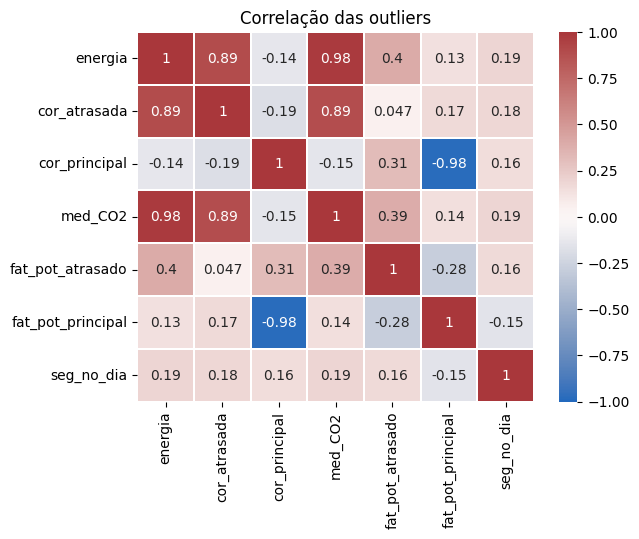

In [254]:
plt.title('Correlação das outliers')
sns.heatmap(otl_car_leve.corr(), vmin = -1, cmap = sns.color_palette("vlag", as_cmap=True), linewidths= 0.1, linecolor='white', annot= True);
plt.show()

C:\Users\amand\AppData\Local\Temp\ipykernel_6728\2490247986.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



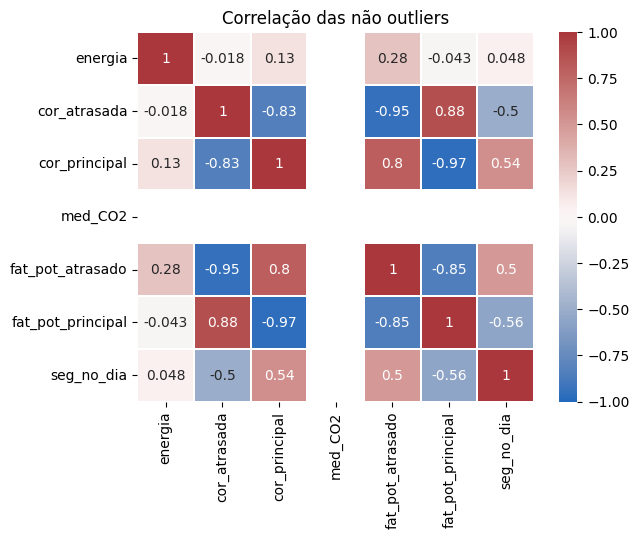

In [255]:
plt.title('Correlação das não outliers')
sns.heatmap(notl_car_leve.corr(), vmin = -1, cmap = sns.color_palette("vlag", as_cmap=True), linewidths= 0.1, linecolor='white', annot= True);
plt.show()

Algumas observações a serem feitas:
- Não outliers: 
    - Fator de potencia: Quando o dado "energia" não é outlier, pode-se imaginar um padrão para este. Primeiramente quanto maior o fator de potencia, menor a corrente. O que está de acordo com o esperado, até porque quanto maior o fator de potencia, significa que está tendo um melhor proveito energético e com isso o consumo é menor. 
    - Medição de CO2: Na queima de combustíveis fósseis para geração de energia elétrica e térmica há a emissão de CO2. Portanto, quanto maior o consumo de energia elétrica de fontes não renováveis, maior será a emissão do gás. Inclusive medir a quantidade de CO2 em determinados locais isolados da fabrica, ajuda a identificar os locais que tem maior e menor aproveitamento energético. Isso contribui na tomada de decisão, quanto ao gerenciamento da fábrica, seja com a manutenção de equipamentos, seja com instalação de resistores e indutores.
    - Dia da semana: No describe, como a feature "est_semanal_Dia da Semana" é uma dummie categórica, a sua média representa quanto desses dias foram dia de semana ou final de semana. Assim, mesmo que proporcionalmente falando os finais de semana representam 2/7 dos dias, com carga leve, como os dias de semana são cerca de 59% os outros 41% se referem aos finais de semana. 

- Outliers:
    - Corrente atrasada: Tratando-se de uma fábrica, a corrente mais usada é a atrasada, visto que utiliza-se muito de motores e transformadores. E a relação entre a corrente e a energia é forte positiva, visto que quanto maior a corrente, logicamente, aumenta o consumo. 
    obs: essa relação é forte pois na maioria dos dados a corrente principal são nulos, então o consumo pela corrente principal não existe, criando uma ligação quase direta entre a corrente atrasada e a energia.
    - Medição de CO2: A correlação é forte entre a energia e o CO2. Até mesmo porque são quantidades muito grandes de energia consumidas, assim a emissão de CO2 é maior. 
    - Fator de potencia atrasado: um apontamento importante é a correlação entre o fator de potencia com a corrente atrasada. Pois esta quase não existe, sendo que o fator de potencia é diretamente ligado a corrente.

Verificando a relação das correntes de acordo com a carga e estado semanal e os fatores de potência ou energia consumida.

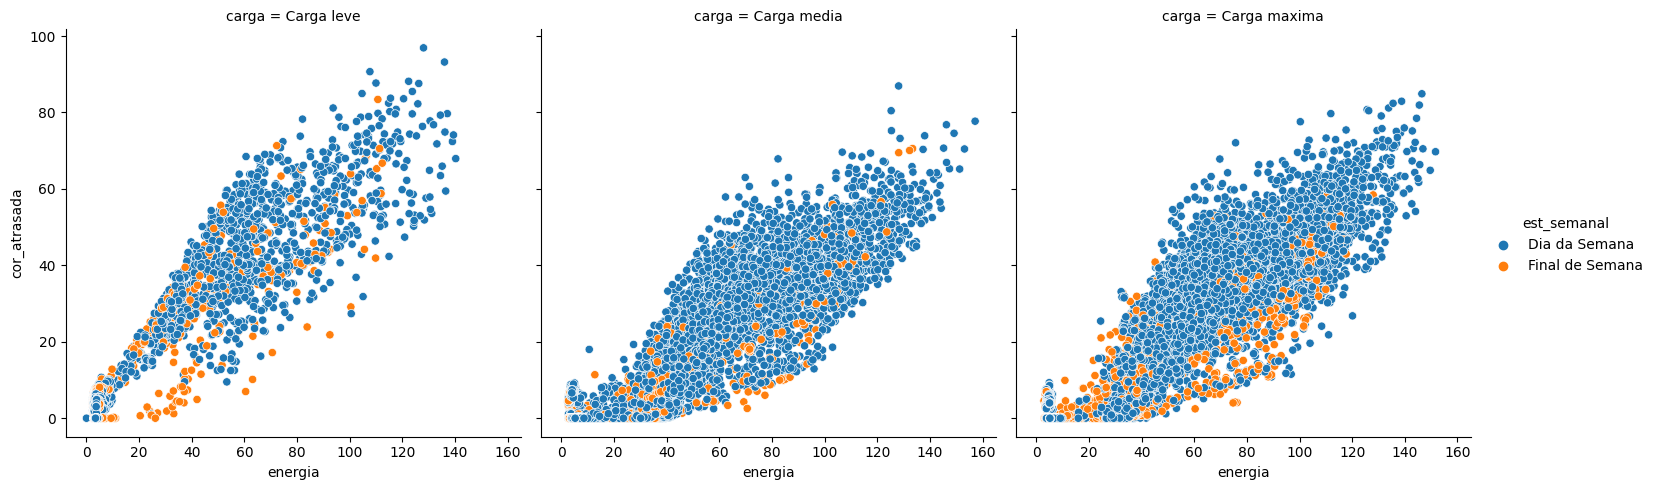

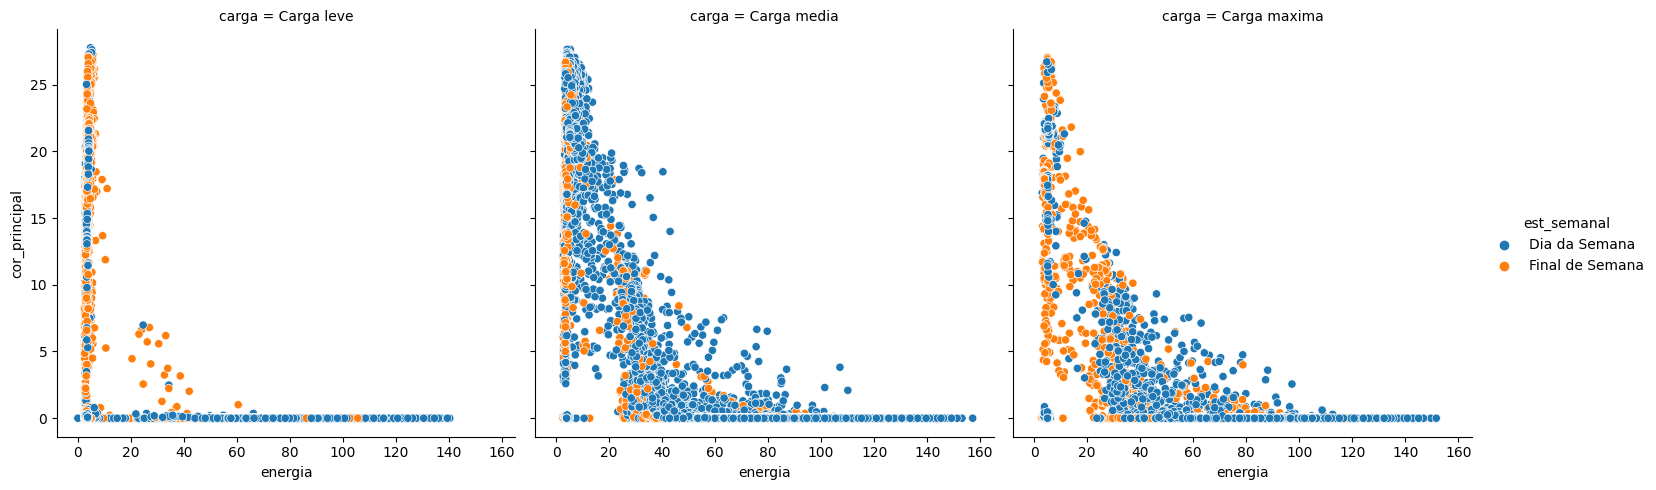

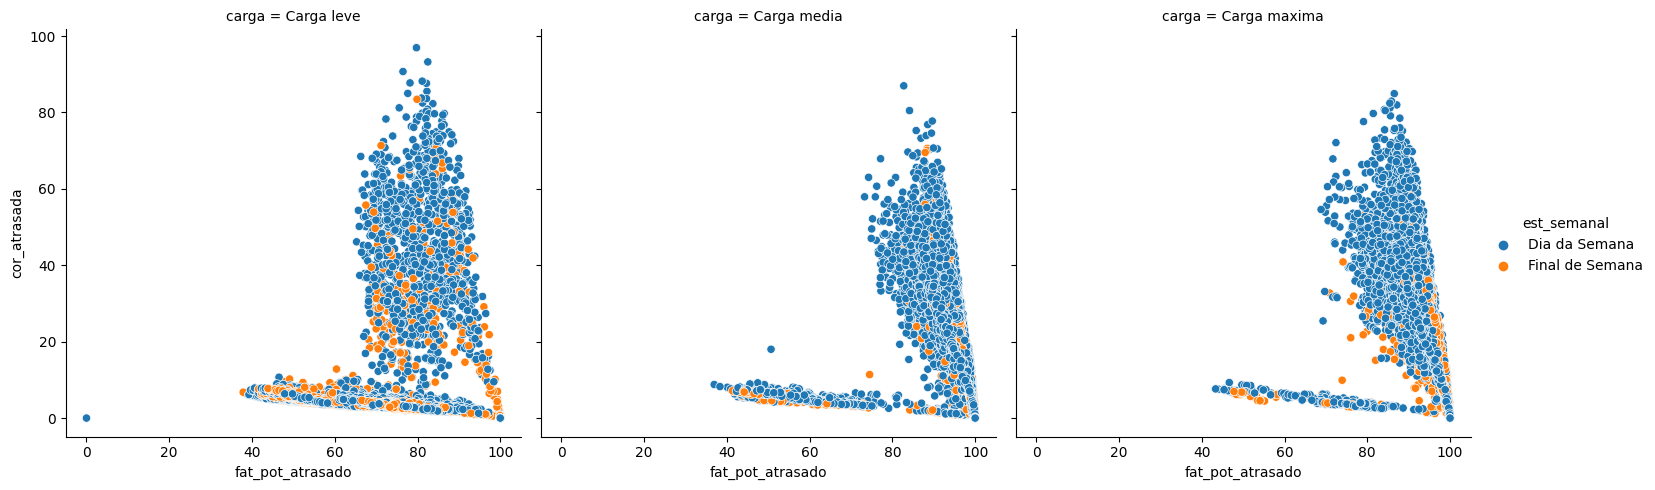

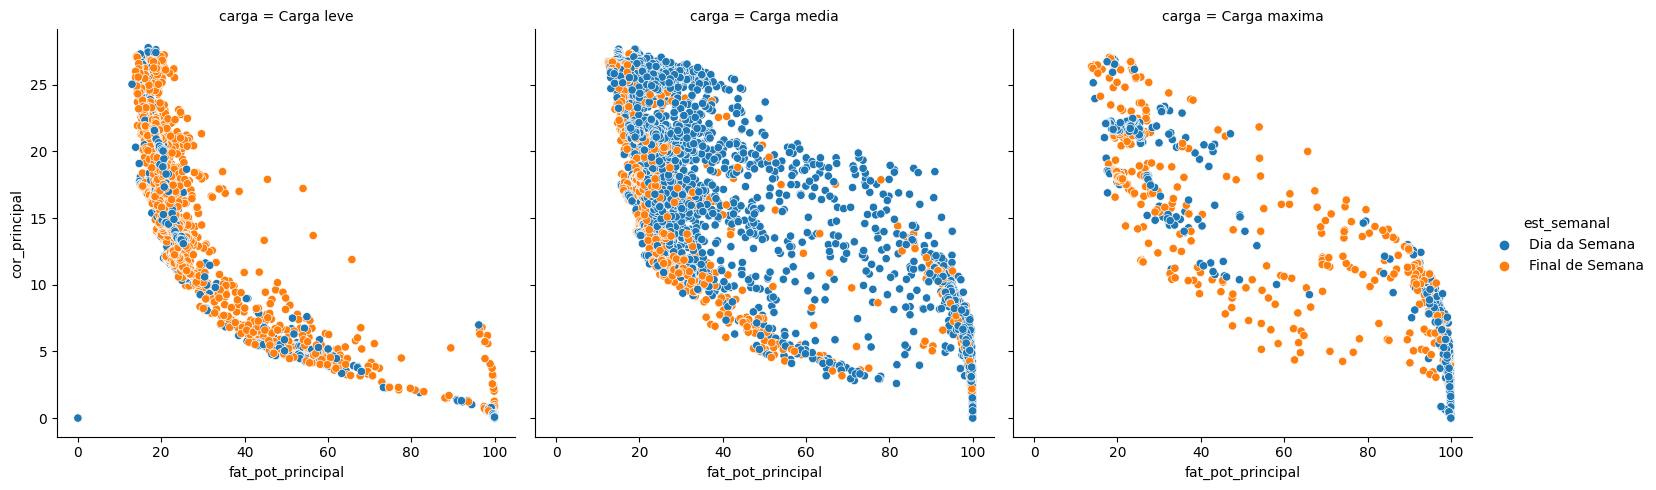

In [256]:
# Plotando gráfico de dispersão para verificar o comporatmento dos dados de acordo com algumas variáveis
sns.relplot(data=df_energy, x='energia', y='cor_atrasada', hue='est_semanal', col='carga')
sns.relplot(data=df_energy, x='energia', y='cor_principal', hue='est_semanal', col='carga')
sns.relplot(data=df_energy, x='fat_pot_atrasado', y='cor_atrasada', hue='est_semanal', col='carga')
sns.relplot(data=df_energy, x='fat_pot_principal', y='cor_principal', hue='est_semanal', col='carga')

De acordo com os gráficos acima há uma tendencia da corrente atrasada aos dias de semana e da corrente principal aos finais de semana no geral. Mas devem ser mais aprofundados para entender este comportamento. A relação entre a corrente principal e a energia é compreensível visto que um dado pode obter um valor 0 na corrente principal, mas um valor de 100 na corrente atrasada o que eleva o consumo de energia de qualquer forma. 

In [257]:
# Plotando gráfico de dispersão entre as variáveis Energia, Corrente Atrasada e Medição de CO2 - dados de carga leve
dados = df_energy.loc[df_energy.carga == 'Carga leve']
fig = px.scatter_3d(x=dados.fat_pot_atrasado, y= dados.cor_atrasada, z=dados.energia)

# Adicionando rótulos aos eixos
fig.update_layout(scene=dict(xaxis_title='Fator de potencia atrasado', yaxis_title='Corrente atrasada', zaxis_title='Energia consumida'))

# Configurando o tamanho do gráfico
fig.update_layout(width=800, height=700)

# Exibindo o gráfico interativo
fig.show()

No gráfico acima, há uma situação a ser estudada, quando o fato de potencia atrasado está baixo, significa que a corrente atrasada está demandando muita energia e retornando para a corrente e nisso, a quantidade de energia consumida deveria ser alta, entretanto, nota-se que muitas vezes em muitos dados no qual o fator de potencia está baixo, a corrente atrasada é nula ou quase nula e a energia consumida é baixa. Necessita-se verificar como está ocorrendo a entrada destes dados, pois é uma inconsistencia nessas informações.

In [258]:
otl_car_leve

energia  cor_atrasada  cor_principal  med_CO2  fat_pot_atrasado  \
125       6.30          4.57           0.00     0.00             80.95   
126       6.05          4.79           0.00     0.00             78.40   
127       6.73          4.54           0.00     0.00             82.90   
128      29.02         18.83           0.07     0.00             83.89   
129      46.19         28.66           0.00     0.00             84.97   
...        ...           ...            ...      ...               ...   
34690    57.74         36.90           0.00     0.03             84.26   
34691    66.46         28.15           0.00     0.03             92.08   
34795     6.19          0.07          17.17     0.00             99.99   
34796    26.17          0.00           5.72     0.01            100.00   
34797     9.36          0.00          13.68     0.00            100.00   

       fat_pot_principal  seg_no_dia      est_semanal   dia_semana       carga  
125               100.00       27000    Dia da Semana  Terca-feira  Carga leve  
126               100.00       27900    Dia da Semana  Terca-feira  Carga leve  
127               100.00       28800    Dia da Semana  Terca-feira  Carga leve  
128               100.00       29700    Dia da Semana  Terca-feira  Carga leve  
129               100.00       30600    Dia da Semana  Terca-feira  Carga leve  
...                  ...         ...              ...          ...         ...  
34690             100.00       31500    Dia da Semana  Sexta-feira  Carga leve  
34691             100.00       32400    Dia da Semana  Sexta-feira  Carga leve  
34795              33.91       39600  Final de Semana       Sabado  Carga leve  
34796              97.69       40500  Final de Semana       Sabado  Carga leve  
34797              56.47       41400  Final de Semana       Sabado  Carga leve  

[2279 rows x 10 columns]

In [259]:
# Plotando gráfico de dispersão entre as variáveis Energia, Corrente Atrasada e Medição de CO2 - dados de carga leve
dados = df_energy.loc[df_energy.carga == 'Carga leve']
fig = px.scatter_3d(x=dados.energia, y= dados.cor_atrasada, z=dados.med_CO2, color= dados['est_semanal'])

# Adicionando rótulos aos eixos
fig.update_layout(scene=dict(xaxis_title='Energia consumida', yaxis_title='Corrente atrasada', zaxis_title='Medição de CO2'))


# Configurando o tamanho do gráfico
fig.update_layout(width=800, height=700)

# Exibindo o gráfico interativo
fig.show()


Nota-se que possui uma relação entre os dados acima - Corrente atrasada, energia e medição de CO² - quanto maior a energia consumida, maior a quantidade de CO², e ainda, vê uma crescente na corrente atrasada, visto que esta é a corrente mais utilizada em setores de fábricas.

In [260]:
# Criando dataframe para visualização de scatterplot matriz
df_pairplot = df_energy[['energia', 'carga', 'cor_atrasada', 'fat_pot_atrasado', 'cor_principal', 'fat_pot_principal', 'med_CO2']]
df_pairplot.loc[df_pairplot.carga == 'Carga leve', 'carga'] = 0
df_pairplot.loc[df_pairplot.carga == 'Carga media', 'carga'] = 1
df_pairplot.loc[df_pairplot.carga == 'Carga maxima', 'carga'] = 2
df_pairplot.head()

energia carga  cor_atrasada  fat_pot_atrasado  cor_principal  \
0     3.17     0          2.95             73.21            0.0   
1     4.00     0          4.46             66.77            0.0   
2     3.24     0          3.28             70.28            0.0   
3     3.31     0          3.56             68.09            0.0   
4     3.82     0          4.50             64.72            0.0   

   fat_pot_principal  med_CO2  
0              100.0      0.0  
1              100.0      0.0  
2              100.0      0.0  
3              100.0      0.0  
4              100.0      0.0

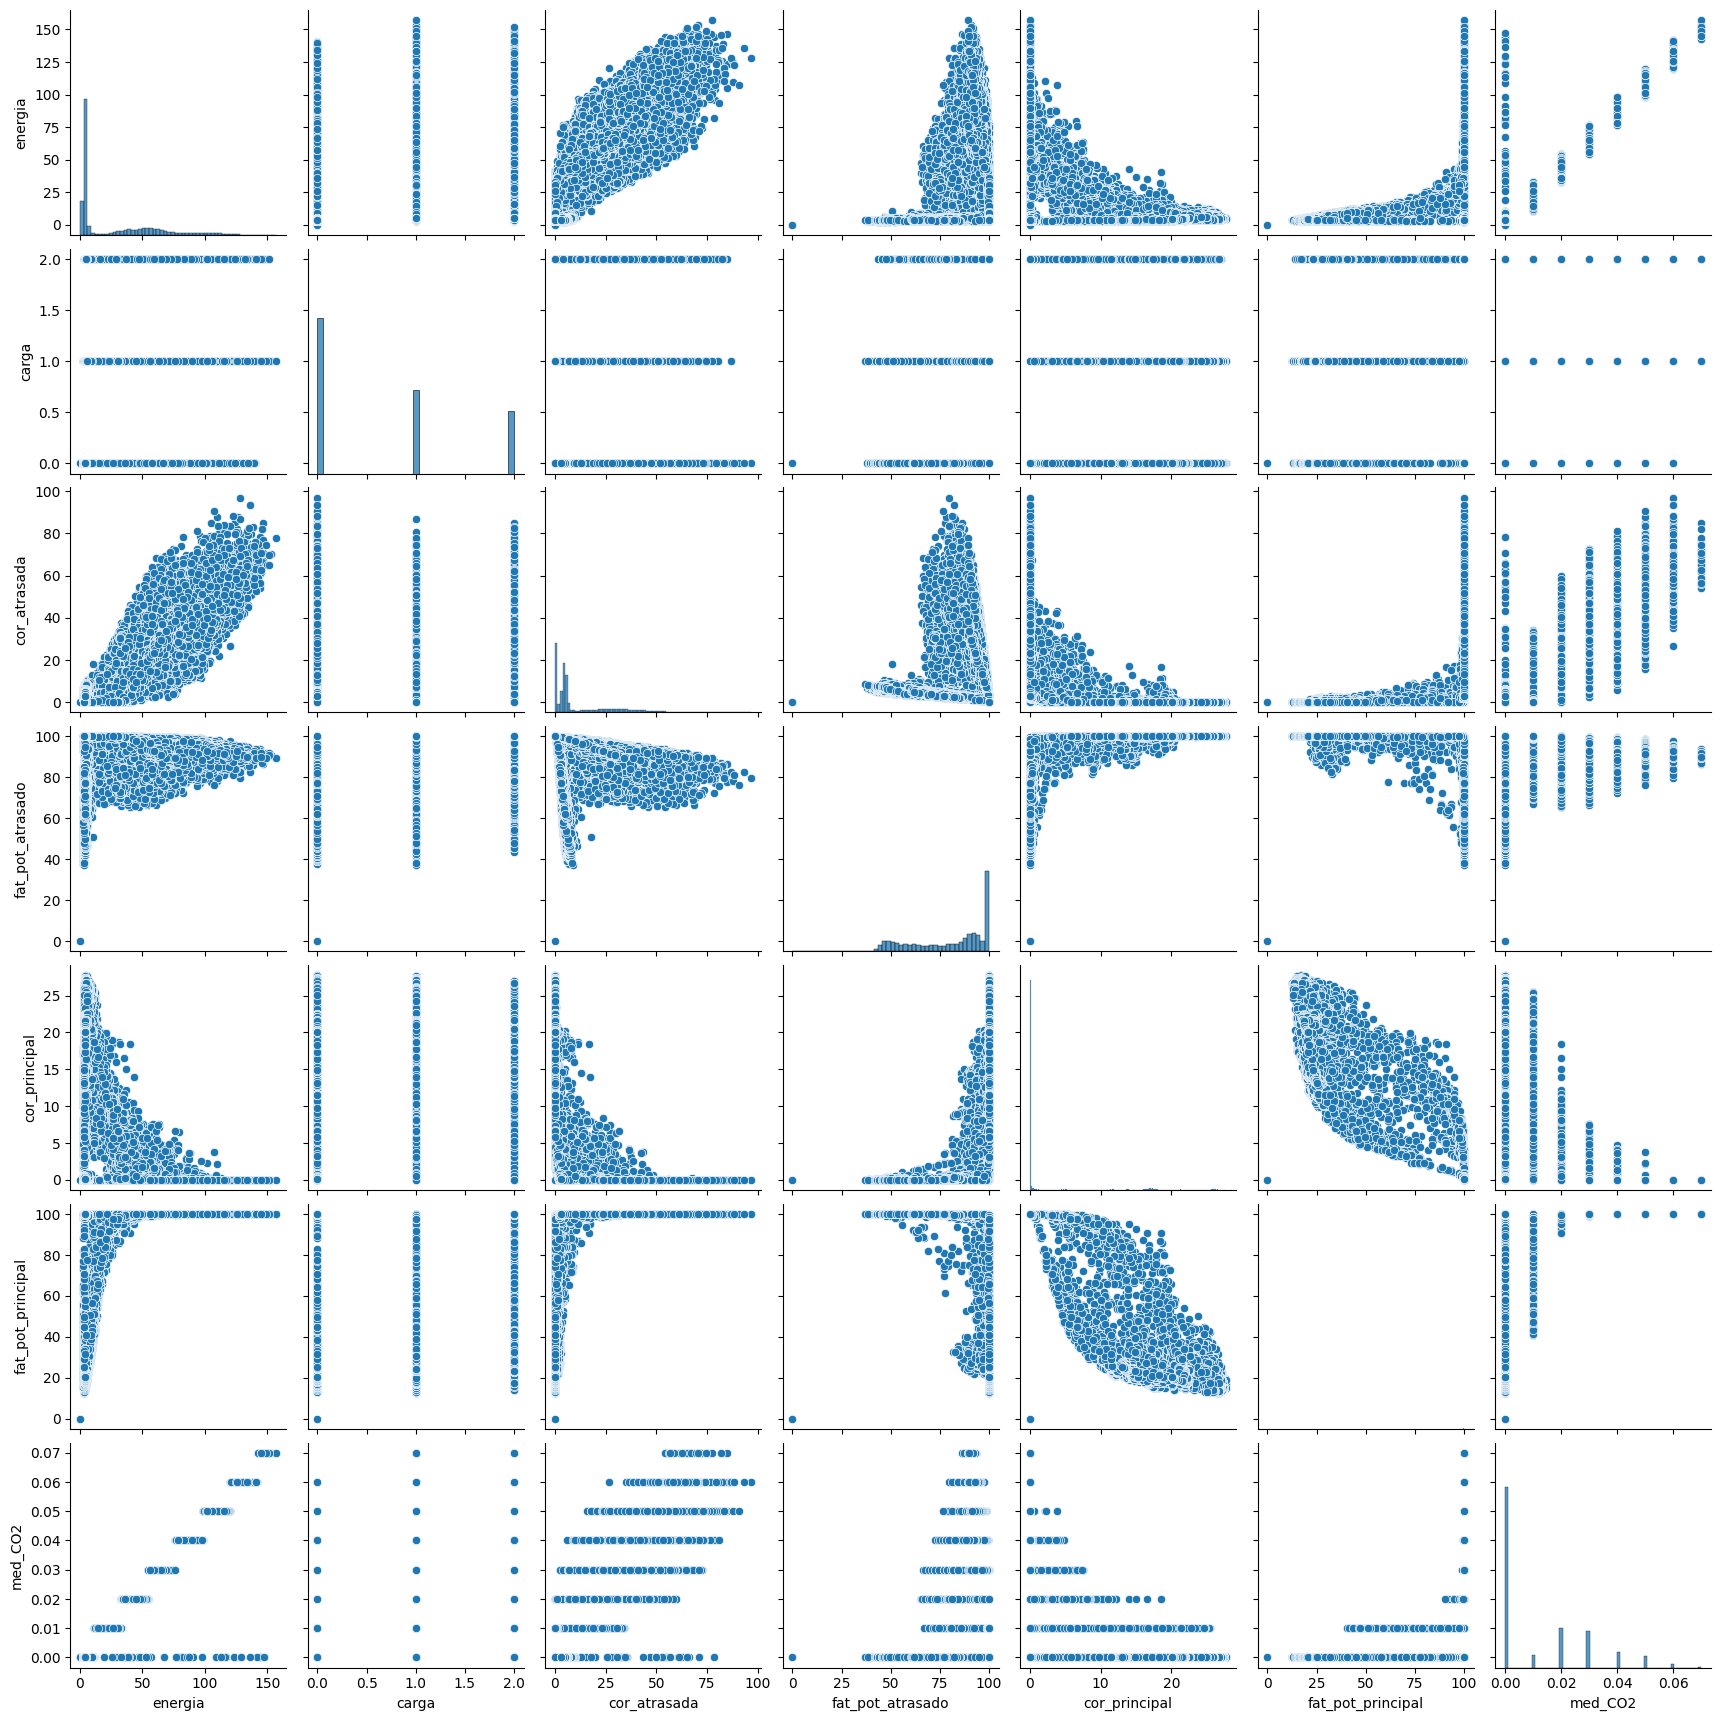

In [261]:
# Plotando gráfico de dispersão em matriz
sns.pairplot(df_pairplot);

Sobre os dados, por mais que há relação entre a corrente e o fator de potencia opostos, ou seja, um é principal e e o outro atrasado, ou entre as proprias correntes e fatores de potencia, estes não são por motivos de causalidade. Não possuem ligação direta. O fator de potência atrasado, interfere diretamente na corrente atrasada, assim como no o fator de potencia principal influencia na corrente principal.

In [262]:
# Criando dataframe para visualização de scatterplot matriz
n_otl_pairplot = notl_car_leve[['energia', 'carga', 'cor_atrasada', 'fat_pot_atrasado', 'cor_principal', 'fat_pot_principal', 'med_CO2']]

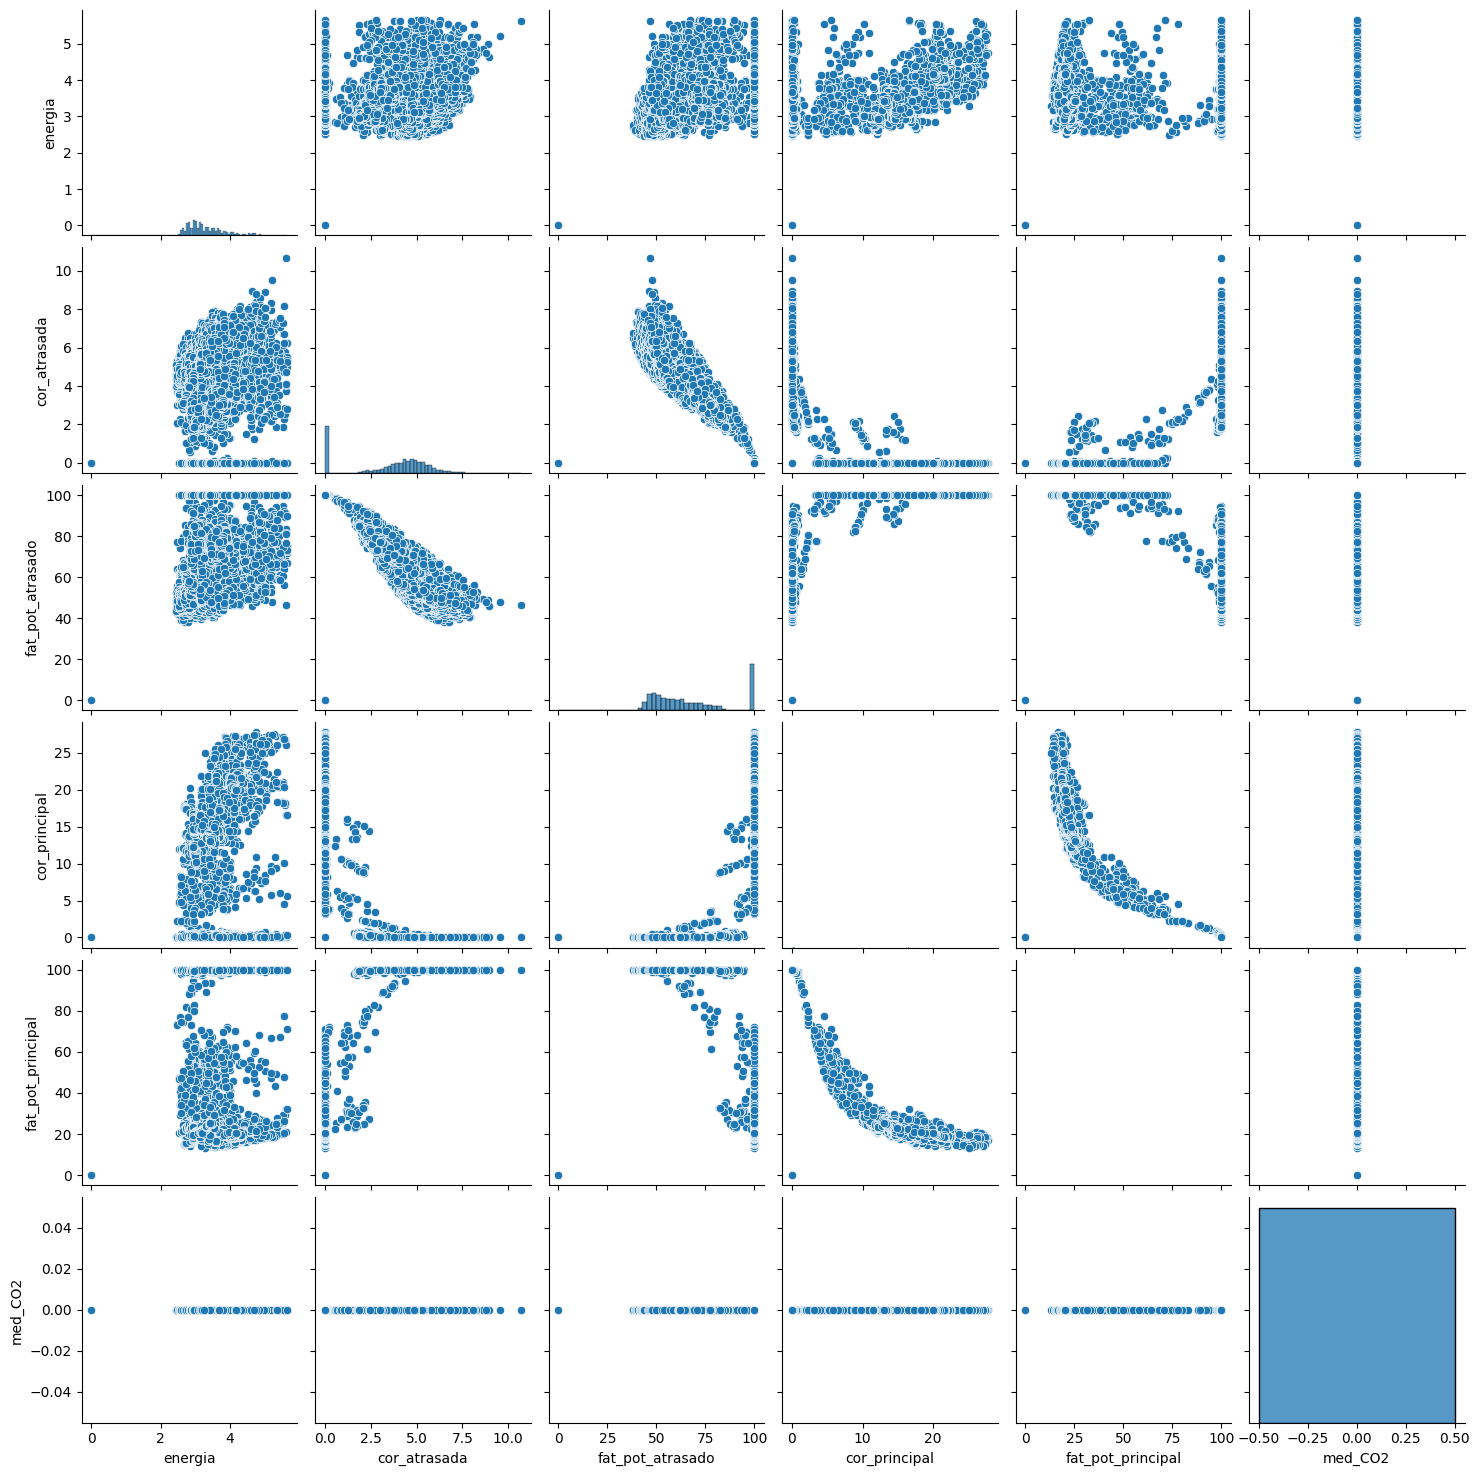

In [263]:
# Plotando gráfico de disperssão em matriz apenas dos dados carga leve que não saõ outliers (energia)
sns.pairplot(n_otl_pairplot);

In [264]:
# Visualizando a distribuição das cargas por estado semanal
df_energy[['cor_atrasada', 'energia', 'carga', 'est_semanal']].groupby(['carga','est_semanal']).count()

cor_atrasada  energia
carga        est_semanal                           
Carga leve   Dia da Semana           11168    11168
             Final de Semana          6904     6904
Carga maxima Dia da Semana            5952     5952
             Final de Semana          1320     1320
Carga media  Dia da Semana            7936     7936
             Final de Semana          1760     1760

O CO2 também desempenha uma importante função na análise de consumo de energia. Pois quanto maior o consumo, maior a concentração da substância no ambiente. 

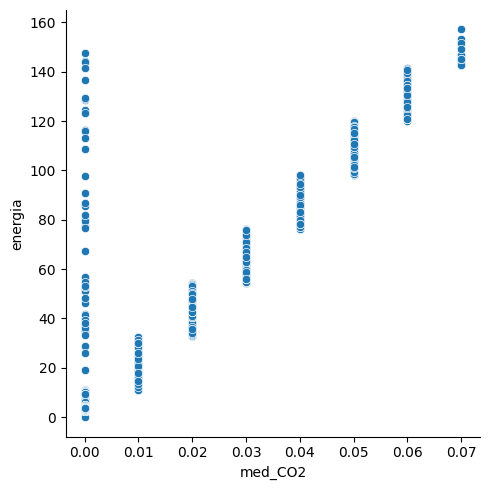

In [265]:
sns.relplot(data=df_energy, x='med_CO2', y='energia')

É perceptível uma forte relação entre os dois no gráfico acima, mas de qualquer forma, há casos no qual o consumo é alto, mas a concetração da substancia é baixa, por isso para o modelo será necessário utilizar das outras variáveis

In [266]:
# Criando dataframe com o consumo agrupado diariamente
consumo_diario = df_energy.groupby(['dia', 'mes'], as_index= False)['energia'].sum()
consumo_diario.head()

dia  mes  energia
0    1    1   351.86
1    1    2  3950.43
2    1    3  3561.05
3    1    4  4977.72
4    1    5  4683.40

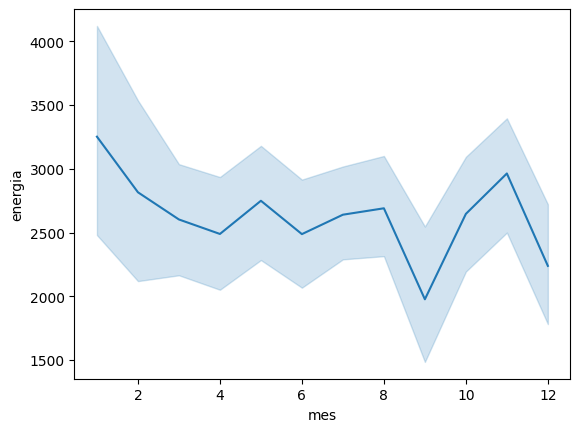

In [267]:
# Plotando gráfico de linha do consumo diário no ano de 2018
sns.lineplot(data=consumo_diario, x='mes', y='energia');

In [268]:
# Criando dataframe com o consumo agrupado mensalmente
consumo_mensal = df_energy.groupby(['mes'], as_index= False)['energia'].sum()
consumo_mensal.head()

mes    energia
0    1  100815.87
1    2   78840.62
2    3   80671.27
3    4   74658.68
4    5   85221.23

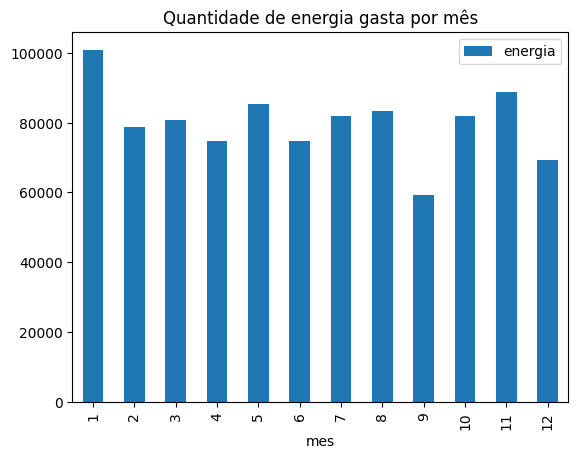

In [269]:
consumo_mensal.plot(x='mes', y='energia',
        kind='bar', 
        stacked= True, 
        title='Quantidade de energia gasta por mês');


In [274]:
df_energy.to_csv('../data/dataset_eda.csv')